In [60]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_stardist_buffered_adata.h5ad')

In [61]:
adata

AnnData object with n_obs × n_vars = 89048 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [62]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [63]:
csv_data

,Genes,DCIS_1,DCIS_2,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,...,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,...,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,...,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,...,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,...,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,...,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,...,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,...,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,...,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,...,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [64]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [75]:
csv_data = csv_data.rename(columns={
    'temp': 'DCIS_2'
})

In [76]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [77]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [78]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [79]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [80]:
csv_data

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [81]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [82]:
csv_data_reordered

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,,
ABCC11,ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [83]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [84]:
csv_data_reordered

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,
ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [85]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_100002': array([ 0.10278984, -0.03814792,  0.12250263,  0.02258244,  0.09903359,
         0.00424084, -0.17762978, -0.18515   , -0.30685091, -0.27406238,
        -0.0396176 , -0.04963225,  0.04907618,  0.0089934 , -0.13606671,
        -0.17281922,  0.19655211,  0.02411275,  0.36468123]),
 'ID_100005': array([-0.0747955 , -0.16805389, -0.01817726, -0.09683627, -0.04807454,
        -0.07663848, -0.17866032, -0.12120896, -0.2374302 , -0.16884652,
         0.06548739,  0.00176151,  0.27394858,  0.53446717, -0.09297034,
        -0.05031771,  0.23224085, -0.07377106,  0.06936814]),
 'ID_100008': array([-0.06357338, -0.19479196,  0.00041647, -0.09805262, -0.03841596,
        -0.05940887,  0.31453902,  0.29940962,  0.04234943,  0.14313136,
        -0.0234703 , -0.01940038,  0.02335504, -0.09591598,  0.00451342,
        -0.12643125,  0.10111241, -0.14298299, -0.03331343]),
 'ID_100010': array([ 0.03234042, -0.03091441,  0.0592169 ,  0.01670865,  0.11983961,
        -0.01784505, -0.0937509 

In [86]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [87]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

             DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100002  0.102790 -0.038148               0.122503        0.022582  \
ID_100005 -0.074795 -0.168054              -0.018177       -0.096836   
ID_100008 -0.063573 -0.194792               0.000416       -0.098053   
ID_100010  0.032340 -0.030914               0.059217        0.016709   
ID_100011 -0.021556 -0.075793              -0.034800       -0.060847   
...             ...       ...                    ...             ...   
ID_99990   0.525123  0.413488               0.442010        0.403272   
ID_99991   0.501164  0.349261               0.419129        0.454742   
ID_99992  -0.074486 -0.143055              -0.093581       -0.154860   
ID_99995   0.526422  0.444166               0.340113        0.329651   
ID_99999  -0.004295 -0.110016               0.018341       -0.072449   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100002       0.099034       0.004241              -0

In [88]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                        CellType
ID_100002            Endothelial
ID_100005          Macrophages_2
ID_100008  T_Cell_&_Tumor_Hybrid
ID_100010                Stromal
ID_100011          Macrophages_2
...                          ...
ID_99990                  DCIS_2
ID_99991                  DCIS_2
ID_99992           Macrophages_2
ID_99995                  DCIS_2
ID_99999   T_Cell_&_Tumor_Hybrid

[89048 rows x 1 columns]


In [89]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType
ID_100002,0.102790,-0.038148,0.122503,0.022582,0.099034,0.004241,-0.177630,-0.185150,-0.306851,-0.274062,-0.039618,-0.049632,0.049076,0.008993,-0.136067,-0.172819,0.196552,0.024113,0.364681,Endothelial
ID_100005,-0.074795,-0.168054,-0.018177,-0.096836,-0.048075,-0.076638,-0.178660,-0.121209,-0.237430,-0.168847,0.065487,0.001762,0.273949,0.534467,-0.092970,-0.050318,0.232241,-0.073771,0.069368,Macrophages_2
ID_100008,-0.063573,-0.194792,0.000416,-0.098053,-0.038416,-0.059409,0.314539,0.299410,0.042349,0.143131,-0.023470,-0.019400,0.023355,-0.095916,0.004513,-0.126431,0.101112,-0.142983,-0.033313,T_Cell_&_Tumor_Hybrid
ID_100010,0.032340,-0.030914,0.059217,0.016709,0.119840,-0.017845,-0.093751,-0.105249,-0.181403,-0.061069,-0.037956,-0.067143,-0.044456,-0.022194,-0.110007,-0.050056,0.254932,0.082636,0.101328,Stromal
ID_100011,-0.021556,-0.075793,-0.034800,-0.060847,-0.051028,-0.002959,-0.062531,-0.046087,-0.066442,-0.064338,0.017010,-0.040302,0.232865,0.258421,-0.072393,0.075739,0.028594,-0.065254,-0.006730,Macrophages_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99990,0.525123,0.413488,0.442010,0.403272,0.306249,0.382194,-0.092391,-0.262107,-0.405688,-0.411850,-0.229197,-0.178917,-0.164291,-0.211604,-0.274223,-0.251799,-0.032706,-0.218471,-0.066856,DCIS_2
ID_99991,0.501164,0.349261,0.419129,0.454742,0.063671,0.106879,-0.055757,-0.198670,-0.295984,-0.312814,-0.163237,-0.138526,-0.134221,-0.157122,-0.172139,-0.196097,-0.055018,-0.189865,-0.056137,DCIS_2
ID_99992,-0.074486,-0.143055,-0.093581,-0.154860,-0.080335,-0.063576,-0.073067,-0.003687,-0.057517,-0.020422,0.082740,0.057098,0.132881,0.380935,-0.070142,-0.048126,0.175815,-0.041931,0.000486,Macrophages_2
ID_99995,0.526422,0.444166,0.340113,0.329651,0.123324,0.153465,-0.086285,-0.205997,-0.304087,-0.303182,-0.161908,-0.140089,-0.126236,-0.148734,-0.222208,-0.187651,-0.028001,-0.183756,-0.042350,DCIS_2


In [90]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [91]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,...,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType,similarity
ID_100002,0.102790,-0.038148,0.122503,0.022582,0.099034,0.004241,-0.177630,-0.185150,-0.306851,-0.274062,...,-0.049632,0.049076,0.008993,-0.136067,-0.172819,0.196552,0.024113,0.364681,Endothelial,0.364681
ID_100005,-0.074795,-0.168054,-0.018177,-0.096836,-0.048075,-0.076638,-0.178660,-0.121209,-0.237430,-0.168847,...,0.001762,0.273949,0.534467,-0.092970,-0.050318,0.232241,-0.073771,0.069368,Macrophages_2,0.534467
ID_100008,-0.063573,-0.194792,0.000416,-0.098053,-0.038416,-0.059409,0.314539,0.299410,0.042349,0.143131,...,-0.019400,0.023355,-0.095916,0.004513,-0.126431,0.101112,-0.142983,-0.033313,T_Cell_&_Tumor_Hybrid,0.314539
ID_100010,0.032340,-0.030914,0.059217,0.016709,0.119840,-0.017845,-0.093751,-0.105249,-0.181403,-0.061069,...,-0.067143,-0.044456,-0.022194,-0.110007,-0.050056,0.254932,0.082636,0.101328,Stromal,0.254932
ID_100011,-0.021556,-0.075793,-0.034800,-0.060847,-0.051028,-0.002959,-0.062531,-0.046087,-0.066442,-0.064338,...,-0.040302,0.232865,0.258421,-0.072393,0.075739,0.028594,-0.065254,-0.006730,Macrophages_2,0.258421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99990,0.525123,0.413488,0.442010,0.403272,0.306249,0.382194,-0.092391,-0.262107,-0.405688,-0.411850,...,-0.178917,-0.164291,-0.211604,-0.274223,-0.251799,-0.032706,-0.218471,-0.066856,DCIS_2,0.525123
ID_99991,0.501164,0.349261,0.419129,0.454742,0.063671,0.106879,-0.055757,-0.198670,-0.295984,-0.312814,...,-0.138526,-0.134221,-0.157122,-0.172139,-0.196097,-0.055018,-0.189865,-0.056137,DCIS_2,0.501164
ID_99992,-0.074486,-0.143055,-0.093581,-0.154860,-0.080335,-0.063576,-0.073067,-0.003687,-0.057517,-0.020422,...,0.057098,0.132881,0.380935,-0.070142,-0.048126,0.175815,-0.041931,0.000486,Macrophages_2,0.380935
ID_99995,0.526422,0.444166,0.340113,0.329651,0.123324,0.153465,-0.086285,-0.205997,-0.304087,-0.303182,...,-0.140089,-0.126236,-0.148734,-0.222208,-0.187651,-0.028001,-0.183756,-0.042350,DCIS_2,0.526422


In [92]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [93]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [94]:
celltype_df = similarity_df[['CellType']].copy()

In [95]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [96]:
adata.obs['CellType'] = celltype_df['CellType']

In [97]:
adata.obs['similarity'] = similarity_df['similarity']

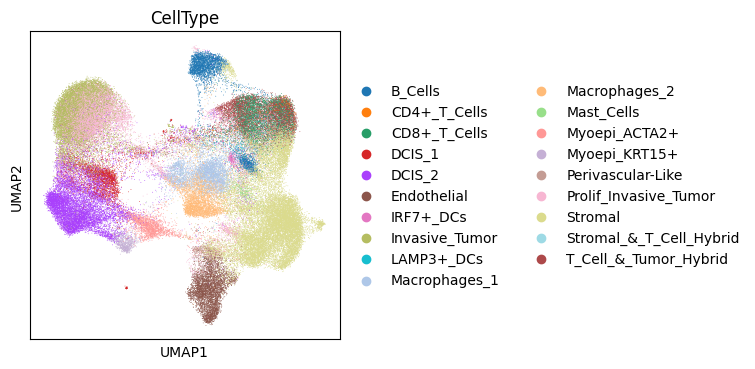

In [98]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

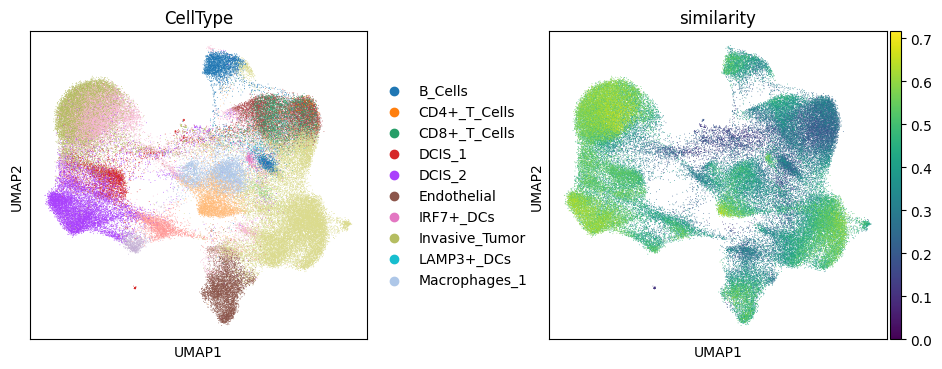

In [99]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [100]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

,Barcode,Cluster
0,1,DCIS_1
1,2,DCIS_1
2,3,Unlabeled
3,4,Invasive_Tumor
4,5,DCIS_1
...,...,...
167775,167776,DCIS_2
167776,167777,DCIS_1
167777,167778,DCIS_2
167778,167779,DCIS_1


In [101]:
annotation_csv[annotation_csv['Barcode']==134602]

,Barcode,Cluster
134601,134602,Stromal


In [102]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [103]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_stardist_buffered.geojson')

In [104]:
joined

,id,cell_id,geometry
0,ID_100002,144585.0,"POLYGON ((23746.55050 11053.08883, 23746.06971..."
1,ID_100005,131974.0,"POLYGON ((21817.63735 11326.49312, 21817.53793..."
2,ID_100008,145665.0,"POLYGON ((22288.15064 10858.40088, 22288.13920..."
3,ID_100010,141210.0,"POLYGON ((22746.02700 13354.62782, 22745.94748..."
4,ID_100011,133954.0,"POLYGON ((21358.01424 12160.32989, 21358.04813..."
...,...,...,...
89043,ID_99990,128380.0,"POLYGON ((21572.97599 13541.12069, 21574.29911..."
89044,ID_99991,140498.0,"POLYGON ((23360.88592 12946.75492, 23361.24398..."
89045,ID_99992,141376.0,"POLYGON ((23213.33343 14018.25390, 23213.40057..."
89046,ID_99995,143461.0,"POLYGON ((23862.22355 11414.94876, 23862.02336..."


In [105]:
adata.obs.reset_index(drop=True, inplace=True)

In [106]:
adata.obs['id'] = adata.obs['id'].values

In [107]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


              id   cell_id                                           geometry
0      ID_100002  144585.0  POLYGON ((23746.55050 11053.08883, 23746.06971...
1      ID_100005  131974.0  POLYGON ((21817.63735 11326.49312, 21817.53793...
2      ID_100008  145665.0  POLYGON ((22288.15064 10858.40088, 22288.13920...
3      ID_100010  141210.0  POLYGON ((22746.02700 13354.62782, 22745.94748...
4      ID_100011  133954.0  POLYGON ((21358.01424 12160.32989, 21358.04813...
...          ...       ...                                                ...
89043   ID_99990  128380.0  POLYGON ((21572.97599 13541.12069, 21574.29911...
89044   ID_99991  140498.0  POLYGON ((23360.88592 12946.75492, 23361.24398...
89045   ID_99992  141376.0  POLYGON ((23213.33343 14018.25390, 23213.40057...
89046   ID_99995  143461.0  POLYGON ((23862.22355 11414.94876, 23862.02336...
89047   ID_99999  131635.0  POLYGON ((21473.82443 11155.31341, 21474.05071...

[89048 rows x 3 columns]


In [108]:
filtered_joined

,id,cell_id,geometry
0,ID_100002,144585.0,"POLYGON ((23746.55050 11053.08883, 23746.06971..."
1,ID_100005,131974.0,"POLYGON ((21817.63735 11326.49312, 21817.53793..."
2,ID_100008,145665.0,"POLYGON ((22288.15064 10858.40088, 22288.13920..."
3,ID_100010,141210.0,"POLYGON ((22746.02700 13354.62782, 22745.94748..."
4,ID_100011,133954.0,"POLYGON ((21358.01424 12160.32989, 21358.04813..."
...,...,...,...
89043,ID_99990,128380.0,"POLYGON ((21572.97599 13541.12069, 21574.29911..."
89044,ID_99991,140498.0,"POLYGON ((23360.88592 12946.75492, 23361.24398..."
89045,ID_99992,141376.0,"POLYGON ((23213.33343 14018.25390, 23213.40057..."
89046,ID_99995,143461.0,"POLYGON ((23862.22355 11414.94876, 23862.02336..."


In [109]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

          id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_100002                 90                 4.510860         187.0  \
1  ID_100005                 40                 3.713572          78.0   
2  ID_100008                 32                 3.496508          47.0   
3  ID_100010                 14                 2.708050          19.0   
4  ID_100011                  8                 2.197225          11.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            5.236442                   78.609626  \
1            4.369448                  100.000000   
2            3.871201                  100.000000   
3            2.995732                  100.000000   
4            2.484907                  100.000000   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0                 

In [110]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [111]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [112]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [113]:
adata.obs['realCellType'] = merged_df['Cluster']

In [114]:
adata.obs[adata.obs['cell_id']=='4']

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType


In [115]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


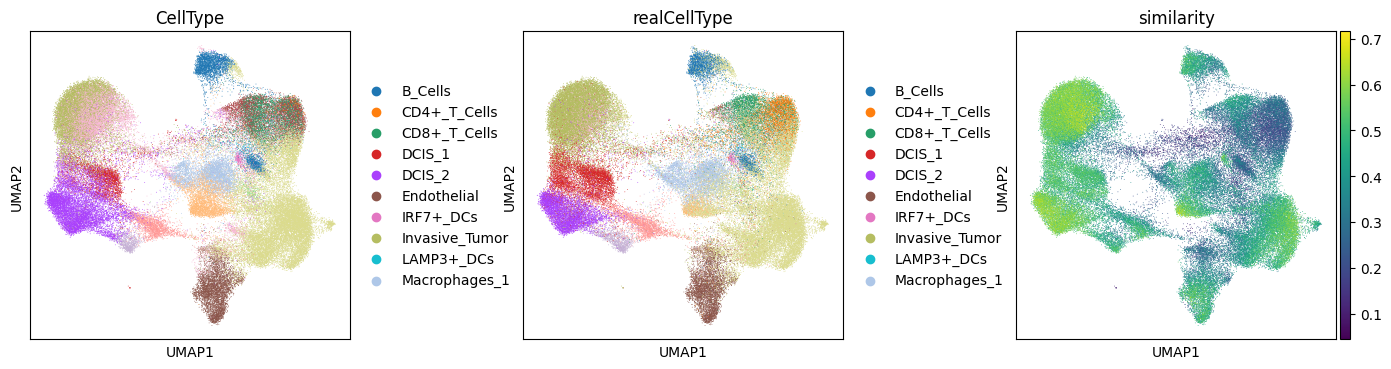

In [116]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [117]:
adata.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType
0,ID_100002,90,4.510860,187.0,5.236442,78.609626,100.0,100.0,100.0,5,Endothelial,0.364681,144585.0,Endothelial
1,ID_100005,40,3.713572,78.0,4.369448,100.000000,100.0,100.0,100.0,4,Macrophages_2,0.534467,131974.0,Macrophages_2
2,ID_100008,32,3.496508,47.0,3.871201,100.000000,100.0,100.0,100.0,2,T_Cell_&_Tumor_Hybrid,0.314539,145665.0,Stromal
3,ID_100010,14,2.708050,19.0,2.995732,100.000000,100.0,100.0,100.0,1,Stromal,0.254932,141210.0,Stromal
4,ID_100011,8,2.197225,11.0,2.484907,100.000000,100.0,100.0,100.0,6,Macrophages_2,0.258421,133954.0,Macrophages_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89043,ID_99990,92,4.532599,362.0,5.894403,84.806630,100.0,100.0,100.0,7,DCIS_2,0.525123,128380.0,DCIS_2
89044,ID_99991,32,3.496508,73.0,4.304065,100.000000,100.0,100.0,100.0,3,DCIS_2,0.501164,140498.0,DCIS_2
89045,ID_99992,19,2.995732,30.0,3.433987,100.000000,100.0,100.0,100.0,4,Macrophages_2,0.380935,141376.0,Stromal
89046,ID_99995,30,3.433987,54.0,4.007333,100.000000,100.0,100.0,100.0,3,DCIS_2,0.526422,143461.0,DCIS_2


In [118]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.4969730395769402


In [119]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [120]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

              id   cell_id                                           geometry   
0      ID_100002  144585.0  POLYGON ((23746.55050 11053.08883, 23746.06971...  \
1      ID_100005  131974.0  POLYGON ((21817.63735 11326.49312, 21817.53793...   
2      ID_100008  145665.0  POLYGON ((22288.15064 10858.40088, 22288.13920...   
3      ID_100010  141210.0  POLYGON ((22746.02700 13354.62782, 22745.94748...   
4      ID_100011  133954.0  POLYGON ((21358.01424 12160.32989, 21358.04813...   
...          ...       ...                                                ...   
92477   ID_99990  128380.0  POLYGON ((21572.97599 13541.12069, 21574.29911...   
92478   ID_99991  140498.0  POLYGON ((23360.88592 12946.75492, 23361.24398...   
92479   ID_99992  141376.0  POLYGON ((23213.33343 14018.25390, 23213.40057...   
92480   ID_99995  143461.0  POLYGON ((23862.22355 11414.94876, 23862.02336...   
92481   ID_99999  131635.0  POLYGON ((21473.82443 11155.31341, 21474.05071...   

                    CellTyp

In [121]:
filtered_joined_with_types.crs = None


In [122]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

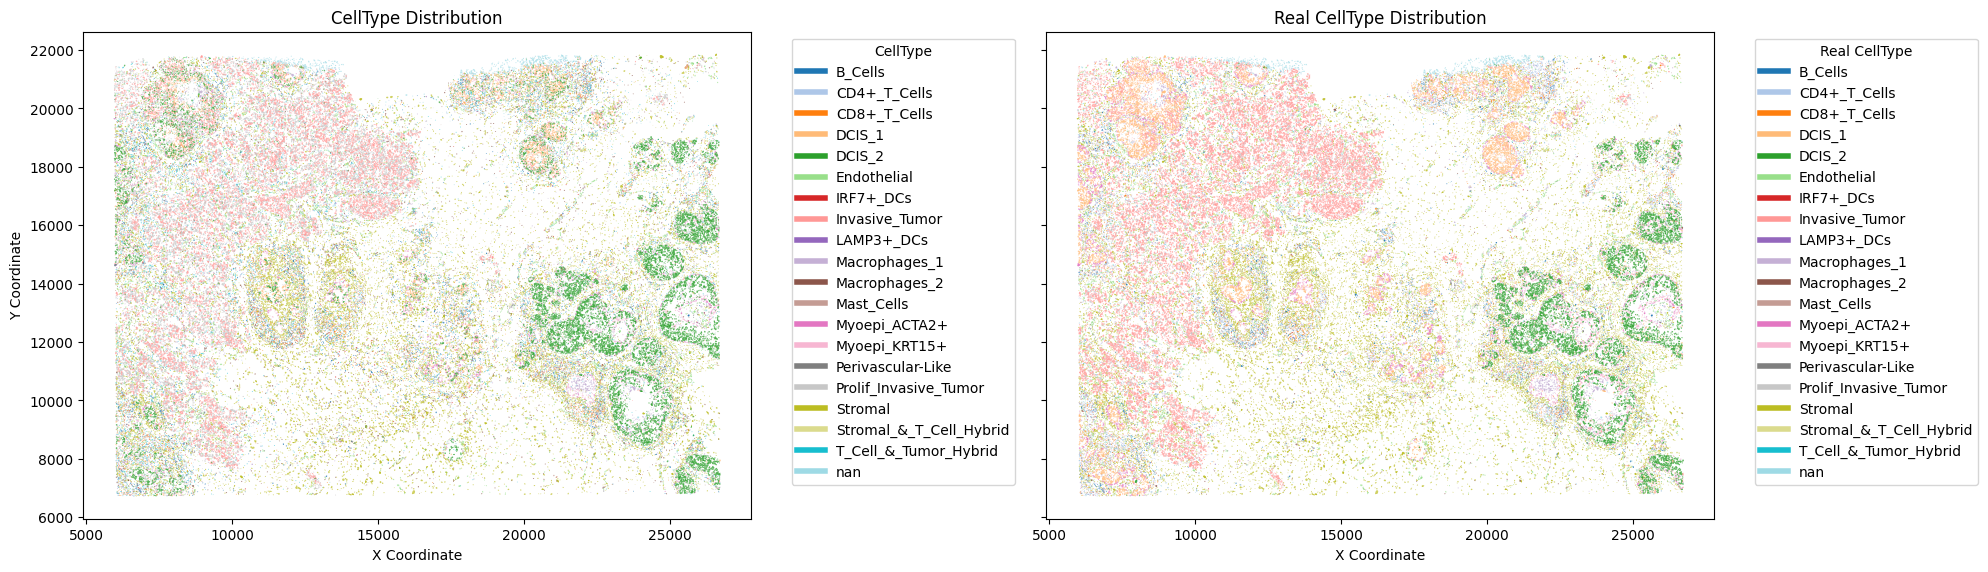

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [124]:
filtered_gdf = filtered_joined_with_types

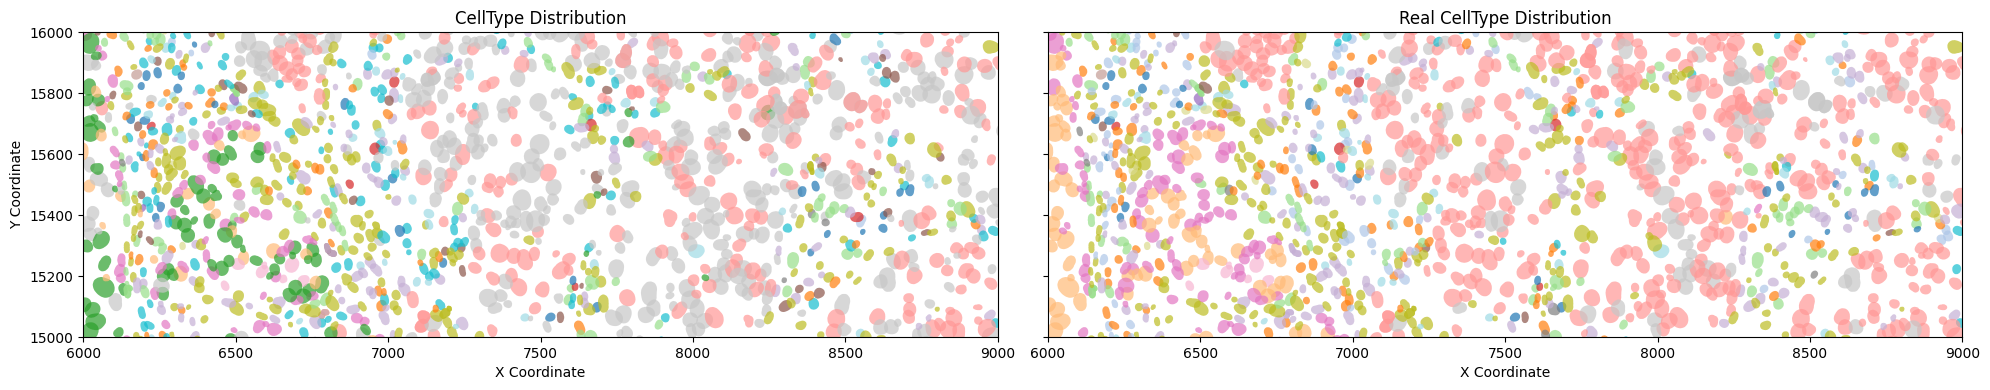

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


In [126]:
adata.write("../data/xenium/outs/final_adatas/adata_stardist_binning_buffered_stats.h5ad")